# Exercise 1: Linear Classifier

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('linear_classifier.csv')
df.head()

,x,y,labels
0,1,13,x
1,8,18,o
2,9,25,x
3,5,25,x
4,4,17,x


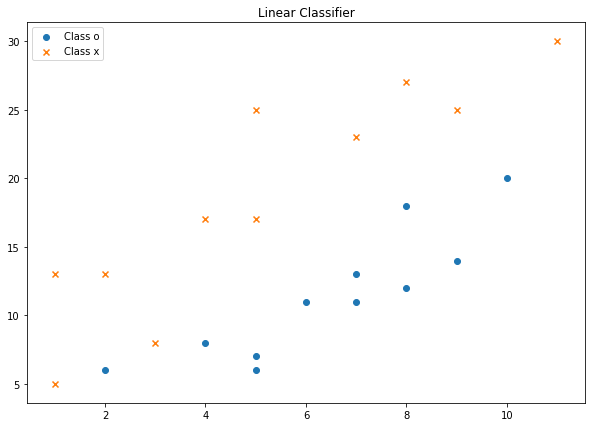

In [9]:
plt.figure(figsize=(10, 7))
for label, label_class in df.groupby('labels'):
    plt.scatter(label_class.values[:,0], label_class.values[:,1],
                label=f'Class {label}', marker=label)
plt.legend()
plt.title("Linear Classifier");

In [25]:
# Fit a linear regression model
model = LinearRegression()
model.fit(df.x.values.reshape((-1, 1)), df.y.values.reshape((-1, 1)))

# Print out the parameters
print(f'y = {model.coef_[0][0]}x + {model.intercept_[0]}')

y = 1.6363401395709483x + 5.50840010338589


In [30]:
# Plot the trendline
trend = model.predict(np.linspace(0, 10).reshape((-1, 1)))

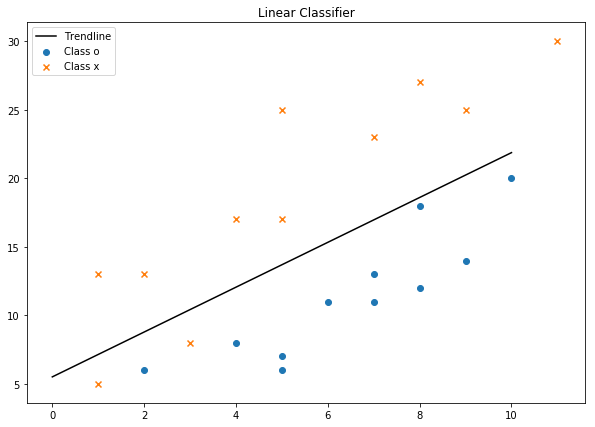

In [34]:
plt.figure(figsize=(10, 7))
for label, label_class in df.groupby('labels'):
    plt.scatter(label_class.values[:,0], label_class.values[:,1],
                label=f'Class {label}', marker=label)
plt.plot(np.linspace(0, 10), trend, c='k', label='Trendline')
plt.legend()
plt.title("Linear Classifier");

In [57]:
# Make predictions
y_pred = model.predict(df.x.values.reshape((-1, 1)))
pred_labels = []

for _y, _y_pred in zip(df.y, y_pred):
    if _y < _y_pred:
        pred_labels.append('o')
    else:
        pred_labels.append('x')
df['Pred Labels'] = pred_labels
df.head()

,x,y,labels,Pred Labels
0,1,13,x,x
1,8,18,o,o
2,9,25,x,x
3,5,25,x,x
4,4,17,x,x


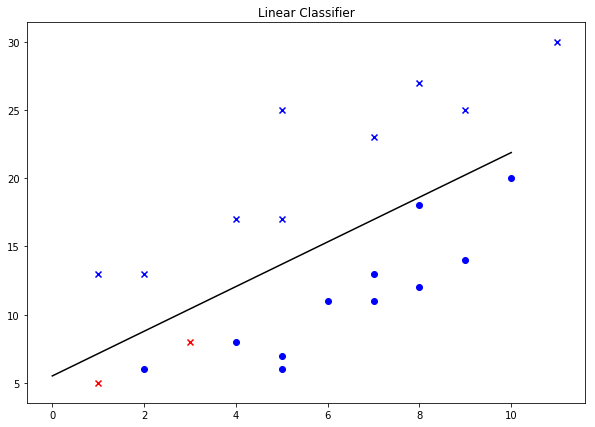

In [60]:
plt.figure(figsize=(10, 7))
for idx, label_class in df.iterrows():
    if label_class.labels == label_class['Pred Labels']:
        c = 'b'
    else:
        c = 'r'
    plt.scatter(label_class.values[0], label_class.values[1],
                label=f'Class {label}', marker=label_class.labels, c=c)
      
plt.plot(np.linspace(0, 10), trend, c='k', label='Trendline')
plt.title("Linear Classifier");